In [1]:
import numpy as np
from copy import deepcopy
import gc
from matplotlib import pyplot as plt
from itertools import product
gc.collect()
%matplotlib inline

In [2]:
per_g = 20
num_groups = 5
partition = [list(range(per_g*i,per_g*(i+1))) for i in range(num_groups)]
print(*partition, sep='\n')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [3]:
def leave(i):
    #probability of leaving if 1/(i%4+2)^2
    if np.random.rand() < [0.18, 0.15, 0.12, 0.015][i%4]:#(2*(i%4)+1)**(-3):
        return True
    else:
        return False
    
def iterate(partition, fixed=False):
    """
    Argument: 
        p(list) - partition of individuals
    Returns:
        the next generation based on probability rules determined by mod 4
    """
    p = deepcopy(partition)
    num_groups = len(p)
    new_comers = [[] for i in range(num_groups)]
    
    for i,group in enumerate(p):
        for indiv in group:
            is_leaving = leave(indiv)
            if is_leaving:
                group.remove(indiv) #####
                new_group = np.random.randint(num_groups-1)
                new_group = new_group if new_group < i else new_group + 1
                new_comers[new_group].append(indiv)
    for i in range(num_groups):
        p[i].extend(new_comers[i])
    return p

In [4]:
generations = [partition]
for i in range(50):
    generations.append(iterate(generations[-1]))

In [5]:
def similar(generations, indiv):
    return [i*4+indiv%4 for i in range(25)]

def markov_maker(generations, indiv):
    similar_indiv = similar(generations, indiv)
    tran = np.zeros((num_groups**3,num_groups**3)) ## we will look at the previous three states to predict
    
    num_p = {p:i for i,p in enumerate(product(range(5),repeat=3))}
    p_num = {i:p for i,p in enumerate(product(range(5),repeat=3))}
    #print(num_p)
    for i in similar_indiv:
        g1 = sum(i*(indiv in group) for i,group in enumerate(generations[0]))
        g2 = sum(i*(indiv in group) for i,group in enumerate(generations[1]))
        g3 = sum(i*(indiv in group) for i,group in enumerate(generations[2]))
        #print(g1,g2,g3)
        k = 1
        if i == indiv:
            k = 3 ##weighting factor
            
        for g_ind in range(3, len(generations)):
            g4 = sum(i*(indiv in group) for i,group in enumerate(generations[g_ind]))
            j = num_p[(g1,g2,g3)]
            i = num_p[(g2,g3,g4)]
            #print((g1,g2,g3,g4),i,j)
            tran[i,j] += k
            g1,g2,g3 = g2,g3,g4
    
    #tran = 0.999*tran
    tran += 0.0001
    tran = tran/np.sum(tran,axis=0)
    return tran

24


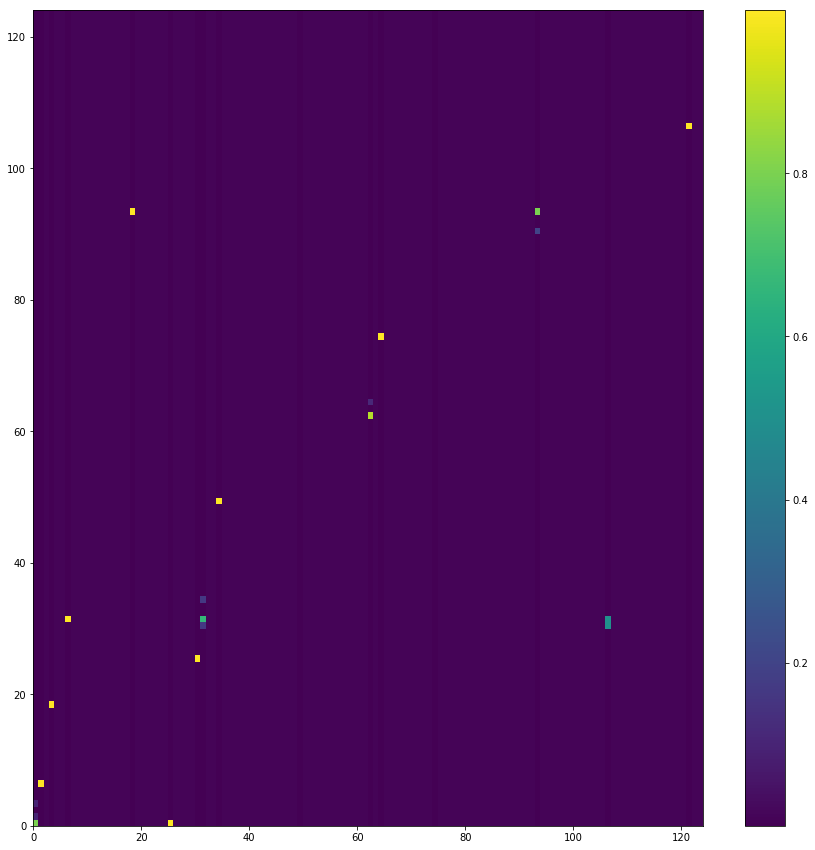

In [6]:
t = markov_maker(generations, 40)
print(np.sum(t>0.009))
num_p = {p:i for i,p in enumerate(product(range(5),repeat=3))}
p_num = {i:p for i,p in enumerate(product(range(5),repeat=3))}
#print(num_p[(1,1,1)])
n,m = t.shape
x = np.arange(n)
y = np.arange(m)
plt.figure(figsize=(15,15))
X,Y = np.meshgrid(x,y)
plt.pcolormesh(X,Y,t)
plt.colorbar()
plt.show()

In [7]:
print(*generations,sep='\n\n')

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 28], [20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 64, 66, 80, 85], [40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62], [61, 63, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 49]]

[[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 28], [20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 64, 66, 80, 85, 6, 50, 92], [40, 41, 42, 43, 44, 45, 

(100, 51)


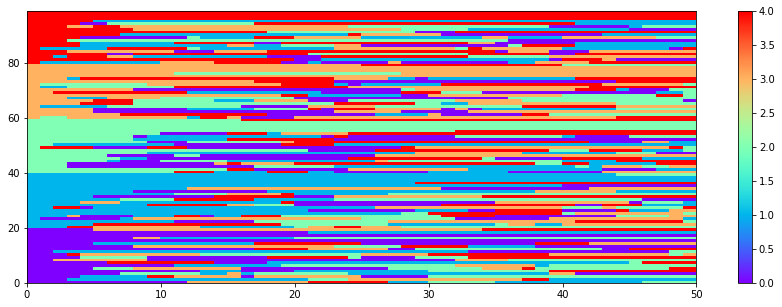

In [8]:
num_groups = len(generations[0])
x = np.arange(len(generations))
y = np.arange(per_g*num_groups)
X,Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
print(Z.shape)
for i,p in enumerate(generations):
    for j,group in enumerate(p):
        for indiv in group:
            #print(i,indiv)
            Z[ (indiv%5) + 5*(indiv%4)+20*(indiv//20), i] = j
            #print((indiv%20//5)+4*(indiv%5)+20*(indiv//20))
            #print(indiv, (indiv%5) + 5*(indiv%4)+20*(indiv//20))
            #Z[indiv,i] = j
plt.figure(figsize=(15,5))
plt.pcolormesh(X,Y,Z,cmap="rainbow")
plt.colorbar()
plt.show()

In [9]:
for i in generations[-1]:
    print(len(i))

10
20
29
16
25


In [10]:
def predict_indiv(generations, indiv, num_pred=50):
    t = markov_maker(generations, indiv)
    #find the group that the individual belonged to in three previous generations
    g1 = sum(i*(indiv in group) for i,group in enumerate(generations[-3]))
    g2 = sum(i*(indiv in group) for i,group in enumerate(generations[-2]))    
    g3 = sum(i*(indiv in group) for i,group in enumerate(generations[-1]))
    group_movement = []
    for i in range(num_pred):
        col = num_p[(g1,g2,g3)]
        outcome = np.random.multinomial(1, t[:, col])
        k = outcome.argmax()
        g1,g2,g3 = g2,g3,p_num[k][2]
        group_movement.append(g3)
    return group_movement

[]

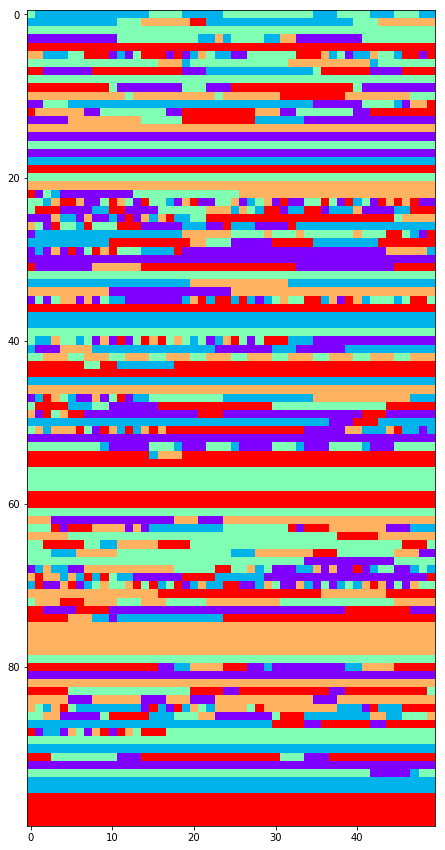

In [11]:
number_to_predict = 50
P = np.zeros((num_groups*per_g,number_to_predict))
for i in range(num_groups*per_g):
    P[(i%5)+5*(i%4)+20*(i//20)] = predict_indiv(generations,i)

x = np.arange(number_to_predict)
y = np.arange(num_groups*per_g)
X,Y = np.meshgrid(x,y)

plt.figure(figsize=(20,15))
plt.imshow(P, cmap='rainbow')
#plt.colorbar()
plt.plot()

## Global Model

In [12]:
def make_data(num_gen, num_groups, num_indiv):
    partition = [[] for i in range(num_groups)]
    per_g = max(1, num_indiv//num_groups)
    for i in range(num_indiv):
        partition[i//per_g%num_groups].append(i)
    gen = [partition]
    for i in range(num_gen):
        gen.append(iterate(gen[-1]))
        
    return gen

#generations = [[[0],[1],[]],[ [0],[],[1] ],[ [1],[0],[] ],[ [0,1],[],[] ],[ [],[1],[0] ],[ [1],[],[0] ],[ [1],[0],[] ],[ [],[],[0,1] ]]
#print(*make_data(50,3,4),sep='\n')

In [13]:
def group_markov(gen, num_groups, num_indiv):
    #network stuff(group to group analysis)
    tran = np.zeros((num_groups,num_groups))
    for indiv in range(num_indiv):
        g1 = sum(i*(indiv in group) for i,group in enumerate(gen[0]))
        for g_ind in range(1,len(gen)):
            g2 = sum(i*(indiv in group) for i,group in enumerate(gen[g_ind]))
            #print(g1,g2,gen[g_ind])
            tran[g1,g2] += 1
            g1 = g2
    
    #tran = 0.999*tran
    tran += 0.0001
    #print(tran)
    tran = tran/np.sum(tran,axis=0)
    return tran

def partition_difference(p1,p2,tran, num_indiv):
    total = 1
    for i in range(num_indiv):
        total *= tran[p1[i],p2[i]]
    return total+0.001

def markov_global(gen, num_groups, num_indiv, num_predictions=20):
    '''
    This is being designed to handle 3 labeled groups and 8 distinct 
    individuals. Already, that requires a 6561x6561 matrix or 
    43,046,721 elements to make the complete Markov chain.
    '''
    index_partition = {p:i for i,p in enumerate(product(range(num_groups),repeat=num_indiv))}
    
    group_tran = group_markov(gen, num_groups, num_indiv)
    global_tran = np.zeros((num_groups**num_indiv, num_groups**num_indiv), dtype=np.float16)
    
    #print(index_partition)
    for (p1,i1),(p2,i2) in product(index_partition.items(),repeat=2):
        #print(p1,i1)
        global_tran[i1,i2] = partition_difference(p1,p2,group_tran, num_indiv)

    return global_tran/np.sum(global_tran, axis=0)

def predict_global():
    
num_gen = 50
num_groups = 3
num_indiv = 6

generations = make_data(num_gen, num_groups, num_indiv)
tran = markov_global(generations, num_groups, num_indiv)

IndentationError: expected an indented block (<ipython-input-13-03d71ca2c767>, line 44)

In [14]:
def predict_indiv(gen, tran, num_indiv, num_pred=50):
    #find the group that the individual belonged to in three previous generations
    index_partition = {p:i for i,p in enumerate(product(range(num_groups),repeat=num_indiv))}
    
    #convert from list of lists to tuple indexed by indiv
    group_indiv = tuple(sum(i*(indiv in group) for i,group in enumerate(gen[-1])) for indiv in range(num_indiv))
    
    p = index_partition[group_indiv]
    group_movement = []
    for i in range(num_pred):
        col = num_p[(g1,g2,g3)]
        outcome = np.random.multinomial(1, t[:, col])
        k = outcome.argmax()
        g1,g2,g3 = g2,g3,p_num[k][2]
        group_movement.append(g3)
    return group_movement